In [3]:
from openslide import open_slide
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

Necessário conter pasta de arquivos adicionais.

In [4]:
slide = open_slide("./PNE 1-3.mrxs")
slide_props = slide.properties

As propriedades da imagem são encontradas em properties.

In [5]:
slide_props = slide.properties
#print(slide_props)

print("Vendor is:", slide_props['openslide.vendor'])
print("Pixel size of X in um is:", slide_props['openslide.mpp-x'])
print("Pixel size of Y in um is:", slide_props['openslide.mpp-y'])

Vendor is: mirax
Pixel size of X in um is: 0.22108910891089101
Pixel size of Y in um is: 0.221447368421053


Obtem um arquivo thumbnail da imagem com resolução máxima indicada.

In [6]:
slide_thumb_600 = slide.get_thumbnail(size=(600,600))
slide_thumb_600.show()

Transforma a imagem em um gráfico matplot.

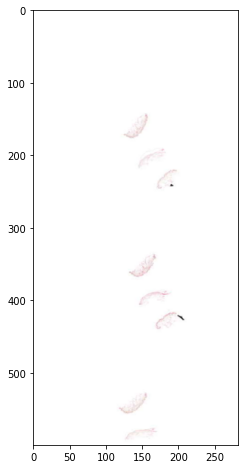

In [7]:
slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_600_np)   

Resoluções encontradas.

In [8]:
dimensions = slide.level_dimensions
print("Resoluções encontradas na imagen e suas reduções: ", dimensions)
n_levels = len(dimensions)
print("Niveis de redução na imagem: ", n_levels)
factors = slide.level_downsamples
print("Fatores de redução de escala: ", factors)

Resoluções encontradas na imagen e suas reduções:  ((109252, 231112), (54626, 115556), (27313, 57778), (13656, 28889), (6828, 14444), (3414, 7222), (1707, 3611), (853, 1805), (426, 902), (213, 451))
Niveis de redução na imagem:  10
Fatores de redução de escala:  (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0)


Obtem a imagem reduzida em 6 vezes da nativa e coverte ela em uma imagem RGB.

In [9]:
level6_dimension = dimensions[6]
level6_img = slide.read_region((0,0), 6, level6_dimension)
img6 = level6_img.convert('RGB')
img6.show()

In [10]:
from openslide.deepzoom import DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
print("Número de níveis que o slide pode ter com as configurações aplicadas acima: ", tiles.level_count)
print("Quantas imagens cada níveis terá: ", tiles.level_dimensions)
print("Número total de imagens geradas: ", tiles.tile_count)


Número de níveis que o slide pode ter com as configurações aplicadas acima:  19
Quantas imagens cada níveis terá:  ((1, 1), (1, 2), (2, 4), (4, 8), (7, 15), (14, 29), (27, 57), (54, 113), (107, 226), (214, 452), (427, 903), (854, 1806), (1708, 3612), (3415, 7223), (6829, 14445), (13657, 28889), (27313, 57778), (54626, 115556), (109252, 231112))
Número total de imagens geradas:  514694


In [30]:
level_num = 11
print("O nível ", level_num, " possui imagens: ", tiles.level_tiles[level_num])
print("Neste nível são ", tiles.level_tiles[level_num][0]*tiles.level_tiles[level_num][1], " imagens no total.")

O nível  11  possui imagens:  (4, 8)
Neste nível são  32  imagens no total.


Salvar imagens separadas para a formação da imagem completa.

In [31]:
cols, rows = tiles.level_tiles[level_num]

import os
tile_dir = "images/saved_tiles/original_tiles/"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' % (col, row))
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(level_num, (col, row))
        temp_tile_RGB = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_RGB)
        plt.imsave(tile_name + ".png", temp_tile_np)

Now saving tile with title:  images/saved_tiles/original_tiles/0_0
Now saving tile with title:  images/saved_tiles/original_tiles/1_0
Now saving tile with title:  images/saved_tiles/original_tiles/2_0
Now saving tile with title:  images/saved_tiles/original_tiles/3_0
Now saving tile with title:  images/saved_tiles/original_tiles/0_1
Now saving tile with title:  images/saved_tiles/original_tiles/1_1
Now saving tile with title:  images/saved_tiles/original_tiles/2_1
Now saving tile with title:  images/saved_tiles/original_tiles/3_1
Now saving tile with title:  images/saved_tiles/original_tiles/0_2
Now saving tile with title:  images/saved_tiles/original_tiles/1_2
Now saving tile with title:  images/saved_tiles/original_tiles/2_2
Now saving tile with title:  images/saved_tiles/original_tiles/3_2
Now saving tile with title:  images/saved_tiles/original_tiles/0_3
Now saving tile with title:  images/saved_tiles/original_tiles/1_3
Now saving tile with title:  images/saved_tiles/original_tiles